# Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#File Paths

In [ ]:
save_path = "/content/drive/MyDrive/CNXSIA001_LAIDS_SOURCE_CODE/PCA-CNN Model Files/Models" # Model path
dataset_path =  "/content/drive/MyDrive/CNXSIA001_LAIDS_SOURCE_CODE/PCA-CNN Model Files/Datasets"

Load in Best PCA and CNN models

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import joblib
import os

# --- Load PCA model with scikit-learn pickle ---
pca_path = os.path.join(save_path,'BEST_PCA.pkl')
pca_model = joblib.load(pca_path)
pca_model_name_prefix = os.path.join(save_path, 'BEST_PCA')


# --- Load CNN model ---
model_path = os.path.join(save_path, 'Best_PCA_CNN.keras')
cnn_model = tf.keras.models.load_model(model_path)
cnn_model_name_prefix = os.path.join(save_path, 'Best_PCA_CNN')

Generate Model graphs

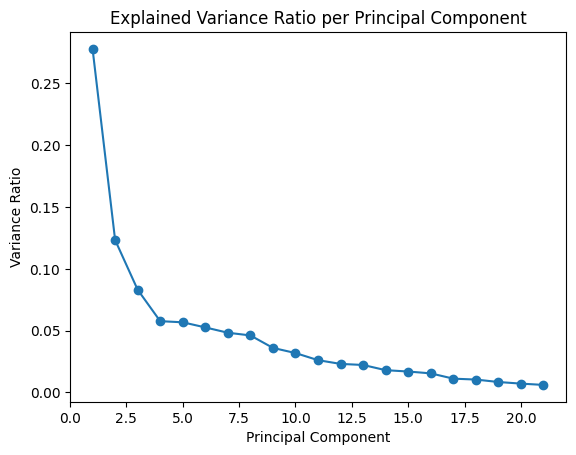

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 20, 32)         │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 20, 32)         │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 10, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 8, 16)          │         1,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 8, 16)          │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 4, 16)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 16)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,959 (38.91 KB)

 Trainable params: 3,287 (12.84 KB)

 Non-trainable params: 96 (384.00 B)

 Optimizer params: 6,576 (25.69 KB)

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

plt.plot(range(1, len(pca_model.explained_variance_ratio_) + 1),
         pca_model.explained_variance_ratio_, marker='o')
plt.title("Explained Variance Ratio per Principal Component")
plt.xlabel("Principal Component")
plt.ylabel("Variance Ratio")
plt.show()

# Print summary in console (text-based)
cnn_model.summary()

# Load in Datasets

In [ ]:
import pandas as pd
import os

#Encoding map
attack_type_map = {'Normal Traffic': 0, 'Port Scanning': 1, 'Web Attacks': 2, 'Brute Force': 3, 'DDoS': 4, 'Bots': 5, 'DoS': 6} # Create a mapping from attack type to integer label

# Load the ADASYN-augmented training data
X_train = pd.read_csv(os.path.join(dataset_path, "adasyn_pca_cnn_X_train.csv"))
y_train = pd.read_csv(os.path.join(dataset_path, "adasyn_pca_cnn_y_train.csv"))

# Load the validation data
X_val = pd.read_csv(os.path.join(dataset_path, "pca_cnn_X_val.csv"))
y_val = pd.read_csv(os.path.join(dataset_path, "pca_cnn_y_val.csv"))

# Load the test data
X_test = pd.read_csv(os.path.join(dataset_path, "pca_cnn_X_test.csv"))
y_test = pd.read_csv(os.path.join(dataset_path, "pca_cnn_y_test.csv"))

# Re-index incase
X_train = X_train.reset_index(drop=True)
X_val   = X_val.reset_index(drop=True)
X_test  = X_test.reset_index(drop=True)


print("Training set class distribution:")
print(y_train.value_counts())

print("\nValidation set class distribution:")
print(y_val.value_counts())

print("\nTest set class distribution:")
print(y_test.value_counts())

Training set class distribution:
Attack Type
6              301889
4              301715
2              301702
5              301702
3              301697
0              301688
1              301212
Name: count, dtype: int64

Validation set class distribution:
Attack Type
0              75423
6              30999
4              20482
1              14511
3               1464
2                343
5                312
Name: count, dtype: int64

Test set class distribution:
Attack Type
0              209506
6               38749
4               25603
1               18139
3                1830
2                 429
5                 389
Name: count, dtype: int64


#Change to numpy arrays

In [ ]:
# --- Change to Numpy Arrays ---

X_train = X_train.to_numpy()# For features (keep 2D)
y_train = y_train.to_numpy().ravel()# For labels (flatten to 1D)

X_val = X_val.to_numpy()
y_val = y_val.to_numpy().ravel()

X_test = X_test.to_numpy()
y_test = y_test.to_numpy().ravel()

print("Datasets converted to numpy arrays!")

Datasets converted to numpy arrays!


#Reshape Data for CNNs

In [ ]:
# Reshape the data so it can be used as input for the 1D CNN (1D CNN expects input shape: (samples, timesteps, channels) - timesteps = number of features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Sanity check
print("Training input shape:", X_train.shape)
print("Validation input shape:", X_val.shape)
print("Test input shape:", X_test.shape)

Training input shape: (2111605, 21, 1)
Validation input shape: (143534, 21, 1)
Test input shape: (294645, 21, 1)


# Dynamic Range Quantization (Weight-only quantisation)

In [ ]:
import tensorflow as tf
from tensorflow import keras

# --- Float32 baseline (no quantization) ---
converter = tf.lite.TFLiteConverter.from_keras_model(cnn_model)
quantModel_f32 = converter.convert()

# --- Weight-only quantization (int8 weights, float32 activations) ---
converter = tf.lite.TFLiteConverter.from_keras_model(cnn_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]  # triggers int8 weight quantization
quantModel_int8_weights = converter.convert()

# --- Weight-only quantization (float16 weights, float32 activations) ---
converter = tf.lite.TFLiteConverter.from_keras_model(cnn_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_types = [tf.float16]  # store weights as float16
quantModel_fp16_weights = converter.convert()

# --- Save models ---
with open(cnn_model_name_prefix + '_float32.tflite', 'wb') as f:
    f.write(quantModel_f32)

with open(cnn_model_name_prefix + '_int8_weights.tflite', 'wb') as f:
    f.write(quantModel_int8_weights)

with open(cnn_model_name_prefix + '_fp16_weights.tflite', 'wb') as f:
    f.write(quantModel_fp16_weights)


INFO:tensorflow:Assets written to: /var/folders/j_/5tg7bs_11dd5dp51xgcdjp340000gn/T/tmp3lvq1nd1/assets


INFO:tensorflow:Assets written to: /var/folders/j_/5tg7bs_11dd5dp51xgcdjp340000gn/T/tmp3lvq1nd1/assets


Saved artifact at '/var/folders/j_/5tg7bs_11dd5dp51xgcdjp340000gn/T/tmp3lvq1nd1'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 21, 1), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 7), dtype=tf.float32, name=None)
Captures:
  5945126416: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5945127376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5945127568: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5945126800: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5945126992: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5945126608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5945128336: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5945129296: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5945128912: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5945128720: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5945128144: TensorSpec(shap

W0000 00:00:1757019782.058414 6107219 tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
W0000 00:00:1757019782.058444 6107219 tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2025-09-04 23:03:02.059350: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /var/folders/j_/5tg7bs_11dd5dp51xgcdjp340000gn/T/tmp3lvq1nd1
2025-09-04 23:03:02.060270: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2025-09-04 23:03:02.060278: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /var/folders/j_/5tg7bs_11dd5dp51xgcdjp340000gn/T/tmp3lvq1nd1
I0000 00:00:1757019782.069260 6107219 mlir_graph_optimization_pass.cc:437] MLIR V1 optimization pass is not enabled
2025-09-04 23:03:02.070739: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2025-09-04 23:03:02.140208: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /var/folder

INFO:tensorflow:Assets written to: /var/folders/j_/5tg7bs_11dd5dp51xgcdjp340000gn/T/tmp55h8g5cl/assets


INFO:tensorflow:Assets written to: /var/folders/j_/5tg7bs_11dd5dp51xgcdjp340000gn/T/tmp55h8g5cl/assets


Saved artifact at '/var/folders/j_/5tg7bs_11dd5dp51xgcdjp340000gn/T/tmp55h8g5cl'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 21, 1), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 7), dtype=tf.float32, name=None)
Captures:
  5945126416: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5945127376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5945127568: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5945126800: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5945126992: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5945126608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5945128336: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5945129296: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5945128912: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5945128720: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5945128144: TensorSpec(shap

W0000 00:00:1757019782.853359 6107219 tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
W0000 00:00:1757019782.853371 6107219 tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2025-09-04 23:03:02.853539: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /var/folders/j_/5tg7bs_11dd5dp51xgcdjp340000gn/T/tmp55h8g5cl
2025-09-04 23:03:02.854418: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2025-09-04 23:03:02.854426: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /var/folders/j_/5tg7bs_11dd5dp51xgcdjp340000gn/T/tmp55h8g5cl
2025-09-04 23:03:02.864015: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2025-09-04 23:03:02.914814: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /var/folders/j_/5tg7bs_11dd5dp51xgcdjp340000gn/T/tmp55h8g5cl
2025-09-04 23:03:02.931141: I tensorflow/cc/saved_model/loader.cc:

INFO:tensorflow:Assets written to: /var/folders/j_/5tg7bs_11dd5dp51xgcdjp340000gn/T/tmpkaawg1v7/assets


INFO:tensorflow:Assets written to: /var/folders/j_/5tg7bs_11dd5dp51xgcdjp340000gn/T/tmpkaawg1v7/assets


Saved artifact at '/var/folders/j_/5tg7bs_11dd5dp51xgcdjp340000gn/T/tmpkaawg1v7'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 21, 1), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 7), dtype=tf.float32, name=None)
Captures:
  5945126416: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5945127376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5945127568: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5945126800: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5945126992: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5945126608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5945128336: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5945129296: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5945128912: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5945128720: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5945128144: TensorSpec(shap

W0000 00:00:1757019783.552764 6107219 tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
W0000 00:00:1757019783.552777 6107219 tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2025-09-04 23:03:03.552930: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /var/folders/j_/5tg7bs_11dd5dp51xgcdjp340000gn/T/tmpkaawg1v7
2025-09-04 23:03:03.553799: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2025-09-04 23:03:03.553813: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /var/folders/j_/5tg7bs_11dd5dp51xgcdjp340000gn/T/tmpkaawg1v7
2025-09-04 23:03:03.563394: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2025-09-04 23:03:03.614557: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /var/folders/j_/5tg7bs_11dd5dp51xgcdjp340000gn/T/tmpkaawg1v7
2025-09-04 23:03:03.630976: I tensorflow/cc/saved_model/loader.cc:

Evaluation of weight-only quant models (Dynamic Range Quantization)

In [ ]:
# --- Imports ---
import os
import psutil
import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import tensorflow as tf

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/tensorflow/lite/python/interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.



 --- Evaluating: Float32 Model ---


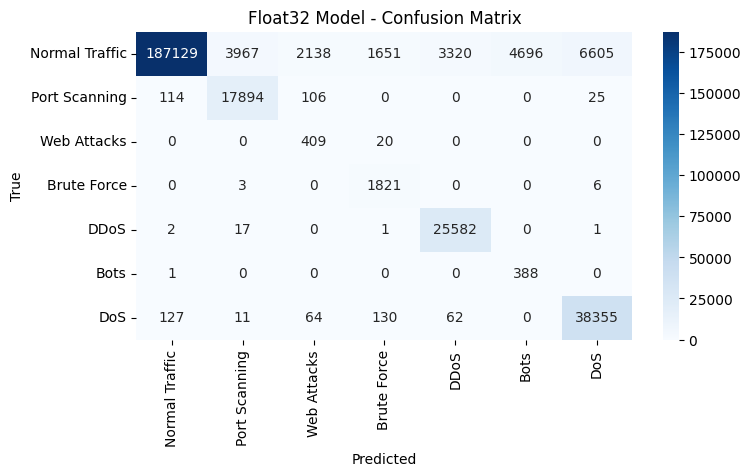

Accuracy: 0.921712569363132
Classification Report:
                precision    recall  f1-score   support

Normal Traffic       1.00      0.89      0.94    209506
 Port Scanning       0.82      0.99      0.89     18139
   Web Attacks       0.15      0.95      0.26       429
   Brute Force       0.50      1.00      0.67      1830
          DDoS       0.88      1.00      0.94     25603
          Bots       0.08      1.00      0.14       389
           DoS       0.85      0.99      0.92     38749

      accuracy                           0.92    294645
     macro avg       0.61      0.97      0.68    294645
  weighted avg       0.95      0.92      0.93    294645

Total Mal: 85139 & 85139
Total Malware Samples: 85139
Total Benign Samples: 209506

TP, TN, FP, FN for Malware vs Benign:
True Positives (Malware predicted as ANY malware): 84895 (99.71% of Malware Identified)
True Negatives (Benign predicted as Benign): 187129 (89.32% of Benign Identified)
False Positives (Benign predicted as M

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/tensorflow/lite/python/interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


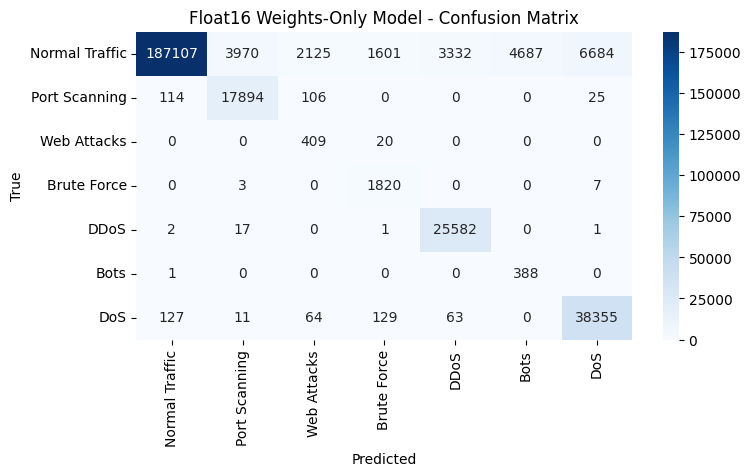

Accuracy: 0.9216345093247806
Classification Report:
                precision    recall  f1-score   support

Normal Traffic       1.00      0.89      0.94    209506
 Port Scanning       0.82      0.99      0.89     18139
   Web Attacks       0.15      0.95      0.26       429
   Brute Force       0.51      0.99      0.67      1830
          DDoS       0.88      1.00      0.94     25603
          Bots       0.08      1.00      0.14       389
           DoS       0.85      0.99      0.92     38749

      accuracy                           0.92    294645
     macro avg       0.61      0.97      0.68    294645
  weighted avg       0.95      0.92      0.93    294645

Total Mal: 85139 & 85139
Total Malware Samples: 85139
Total Benign Samples: 209506

TP, TN, FP, FN for Malware vs Benign:
True Positives (Malware predicted as ANY malware): 84895 (99.71% of Malware Identified)
True Negatives (Benign predicted as Benign): 187107 (89.31% of Benign Identified)
False Positives (Benign predicted as 

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/tensorflow/lite/python/interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


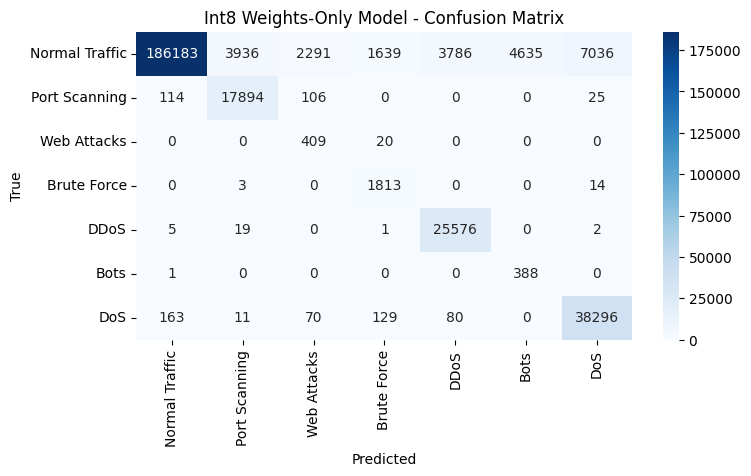

Accuracy: 0.9182541702727011
Classification Report:
                precision    recall  f1-score   support

Normal Traffic       1.00      0.89      0.94    209506
 Port Scanning       0.82      0.99      0.89     18139
   Web Attacks       0.14      0.95      0.25       429
   Brute Force       0.50      0.99      0.67      1830
          DDoS       0.87      1.00      0.93     25603
          Bots       0.08      1.00      0.14       389
           DoS       0.84      0.99      0.91     38749

      accuracy                           0.92    294645
     macro avg       0.61      0.97      0.68    294645
  weighted avg       0.95      0.92      0.93    294645

Total Mal: 85139 & 85139
Total Malware Samples: 85139
Total Benign Samples: 209506

TP, TN, FP, FN for Malware vs Benign:
True Positives (Malware predicted as ANY malware): 84856 (99.67% of Malware Identified)
True Negatives (Benign predicted as Benign): 186183 (88.87% of Benign Identified)
False Positives (Benign predicted as 

In [ ]:
# --- Evaluate Dyanmic Quant Models ---

# List of TFLite models
tflite_models = [
    {"model": quantModel_f32, "name": "Float32 Model"},
    {"model": quantModel_fp16_weights, "name": "Float16 Weights-Only Model"},
    {"model": quantModel_int8_weights, "name": "Int8 Weights-Only Model"},
]

# Evaluate the models
for m in tflite_models:

    the_model = m["model"]
    model_name = m["name"]
    print(f"\n --- Evaluating: {model_name} ---")

    # Load the TFLite model and get it ready to make predictions
    interpreter = tf.lite.Interpreter(model_content=the_model) # Create interpreter object that will read and run the TFLite model
    interpreter.allocate_tensors() # Make the interpreter allocate memory
    input_details = interpreter.get_input_details() # Get expected shape and data type of the data the model needs to evaluate
    output_details = interpreter.get_output_details() # Shape and data type the model will need to produce the results in


    # Get model predictions for test sample
    y_pred_probs = []

    for i in range(len(X_test)): # Interpreter object does not have a built-in .evaluate() method like the Keras Model object does, therefore need to go through every sample manually
        input_data = np.expand_dims(X_test[i], axis=0).astype(input_details[0]['dtype']) # shape the input again so they final input sample is : (1, num_features, 1)
        interpreter.set_tensor(input_details[0]['index'], input_data) #Feed a single sample of input data into the TFLite interpreter
        interpreter.invoke() # Tell the interpreter to run the model on the input data
        output_data = interpreter.get_tensor(output_details[0]['index']) # Get the output from the model
        y_pred_probs.append(output_data[0]) # Add the raw output to the list

    y_pred_probs = np.array(y_pred_probs) # Convert the list to a single NumPy array
    y_pred = np.argmax(y_pred_probs, axis=1) # Get the predicted class label for each sample


    # --- Confusion Matrix ---
    cm = confusion_matrix(y_test, y_pred)
    reverse_attack_type_map = {v: k for k, v in attack_type_map.items()}
    labels = [reverse_attack_type_map.get(i, f'Unknown {i}') for i in range(cm.shape[0])]

    # Create confusion matrix plot
    plt.figure(figsize=(8, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    # Print accuracy & classification report
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=labels))

    # Calculate malware vs benign sample metrics
    normal_traffic = attack_type_map.get('Normal Traffic', None)


    if normal_traffic is not None:
        total_benign = np.sum(cm[normal_traffic, :])
        benign_identified_correctly = cm[normal_traffic, normal_traffic] #TN
        benign_misclassified =  total_benign - benign_identified_correctly #FP

        tn = benign_identified_correctly
        fp = benign_misclassified

        total_malware = len(X_test) - total_benign
        print(f"Total Mal: {len(X_test) - total_benign} & {np.sum(cm) - np.sum(cm[normal_traffic, :])}")

        # Count all malware samples correctly identified (diagonal elements excluding normal traffic)
        malware_identified_correctly = np.sum(np.diag(cm)) - cm[normal_traffic, normal_traffic]

        # Count all the malware samples identified even if misclassified as the wrong type of malware
        total_malware_identified = 0
        for i in range(len(labels)):
            if i != normal_traffic:  # skip the normal traffic row in the cm
                # for a row/class in the cm, count the samples from malware class that were predicted as ANY malware type (not benign)
                malware_predicted_as_any_malware = np.sum(cm[i, :]) - cm[i, 0] # Count all the samples in the row, minus the column of samples predicted as normal traffic
                total_malware_identified += malware_predicted_as_any_malware

        malware_misclassified = total_malware - total_malware_identified

        fn = malware_misclassified
        tp = total_malware_identified

        print(f"Total Malware Samples: {total_malware}")
        print(f"Total Benign Samples: {total_benign}")

        # --- Calculate and print TP, TN, FP, FN for Malware vs Benign ---
        print("\nTP, TN, FP, FN for Malware vs Benign:")
        print(f"True Positives (Malware predicted as ANY malware): {tp} ({(total_malware_identified/total_malware)*100:.2f}% of Malware Identified)")
        print(f"True Negatives (Benign predicted as Benign): {tn} ({(benign_identified_correctly/total_benign)*100:.2f}% of Benign Identified)")
        print(f"False Positives (Benign predicted as Malware): {fp} ({(benign_misclassified/total_benign)*100:.2f}% of Benign Misclassified)")
        print(f"False Negatives (Malware predicted as Benign): {fn} ({(malware_misclassified/total_malware)*100:.2f}% of Malware Misclassified)")

        print("\nPercentage of each Malware Class Correctly Identified:")
        for i, label in enumerate(labels):
            if i != normal_traffic: # Exclude 'Normal Traffic'
                correctly_identified = cm[i, i]
                total_in_class = np.sum(cm[i, :])
                percentage_identified = (correctly_identified / total_in_class) * 100 if total_in_class > 0 else 0
                print(f"{label}: {percentage_identified:.2f}%")

        # ---- Performance Metrics ---
        #Accuracy
        accuracy = (tp + tn)/(tp + tn + fp + fn)
        # Precision (for malware class)
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        # Recall / Sensitivity (for malware class)
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        # F1-Score
        f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
        # False Positive Rate (FPR)
        fpr = (fp / (fp + tn))*100 if (fp + tn) > 0 else 0
        # False Negative Rate (FNR)
        fnr = (fn / (fn + tp))*100 if (fn + tp) > 0 else 0

        print("\n--- Malware vs Benign Performance Metrics ---")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision (Malware): {precision:.4f}")
        print(f"Recall / Sensitivity (Malware): {recall:.4f}")
        print(f"F1-Score (Malware): {f1_score:.4f}")
        print(f"False Positive Rate (Benign misclassified): {fpr:.2f}%")
        print(f"False Negative Rate (Malware missed): {fnr:.2f}%")




#Full integer 8 Quantisation of the model

In [ ]:
# --- Imports ---
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras import regularizers
import os

In [ ]:
import numpy as np # Import numpy for representative dataset

def representative_dataset_gen():
    # Get class distribution
    class_types, class_counts = np.unique(y_train, return_counts=True) # Get all the unique attack classes in y_train and how many samples each class has
    class_indices = [np.where(y_train == c)[0] for c in class_types] # For a class,'c', get all the indices of samples in X-train that belong to that class

    # Pick equal number of samples per class
    selected_indices = []
    rng = np.random.default_rng(seed=1)
    for indices in class_indices:
        selected_indices.extend(rng.choice(indices, 50, replace=False))

    np.random.shuffle(selected_indices)
    representative_indices = selected_indices


    # Yield samples with batch + channel dimensions
    for i in representative_indices:
        yield [np.expand_dims(X_train[i].astype(np.float32), 0)]

In [ ]:
# --- Full Integer Model Quantization ---
converter = tf.lite.TFLiteConverter.from_keras_model(cnn_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT] # Apply default optimizations (int8)
converter.representative_dataset = representative_dataset_gen # Provide the representative dataset and ensure input dtype is float32
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]

# Set the input and output types to int8 for inference
converter.inference_input_type = tf.int8
converter.inference_output_type = tf.int8
quantModel_int8 = converter.convert() # Convert the model

# --- Save models ---
os.makedirs('models', exist_ok=True)
with open(cnn_model_name_prefix + '_int8_full.tflite', 'wb') as f:
    f.write(quantModel_int8)

INFO:tensorflow:Assets written to: /var/folders/j_/5tg7bs_11dd5dp51xgcdjp340000gn/T/tmpk1hupj29/assets


INFO:tensorflow:Assets written to: /var/folders/j_/5tg7bs_11dd5dp51xgcdjp340000gn/T/tmpk1hupj29/assets


Saved artifact at '/var/folders/j_/5tg7bs_11dd5dp51xgcdjp340000gn/T/tmpk1hupj29'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 21, 1), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 7), dtype=tf.float32, name=None)
Captures:
  5945126416: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5945127376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5945127568: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5945126800: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5945126992: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5945126608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5945128336: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5945129296: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5945128912: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5945128720: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5945128144: TensorSpec(shap

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/tensorflow/lite/python/convert.py:863: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(
W0000 00:00:1757019793.609133 6107219 tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
W0000 00:00:1757019793.609145 6107219 tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2025-09-04 23:03:13.609319: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /var/folders/j_/5tg7bs_11dd5dp51xgcdjp340000gn/T/tmpk1hupj29
2025-09-04 23:03:13.610146: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2025-09-04 23:03:13.610157: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /var/folders/j_/5tg7bs_11dd5dp51xgcdjp340000gn/T/tmpk1hupj29
2025-09-04 23:03:13.619460: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2025-09-04 23:03:13.

Evaluation of full int quant models

In [ ]:
# -- Imports ---
import os
import psutil
import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import tensorflow as tf

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/tensorflow/lite/python/interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)



=== Evaluating: Int8 Quantized Model ===


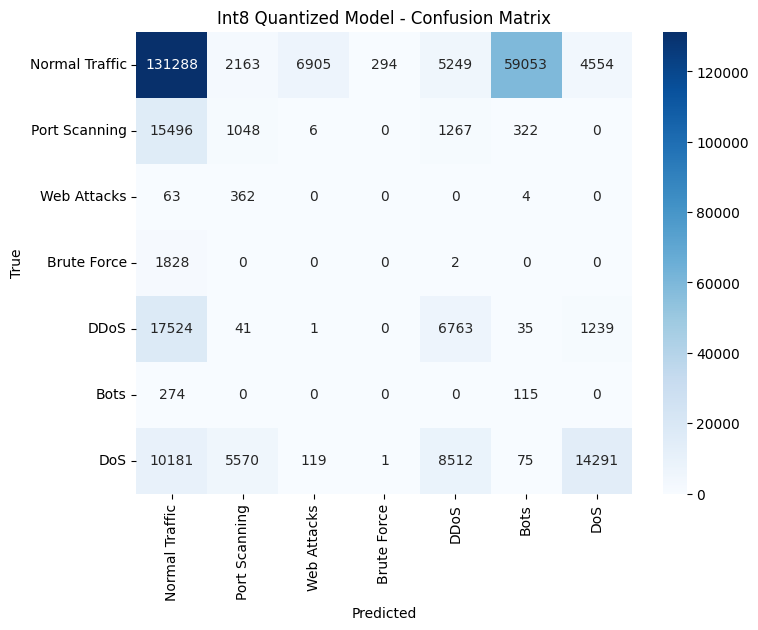

Accuracy: 0.5209828777002834
Classification Report:
                precision    recall  f1-score   support

Normal Traffic       0.74      0.63      0.68    209506
 Port Scanning       0.11      0.06      0.08     18139
   Web Attacks       0.00      0.00      0.00       429
   Brute Force       0.00      0.00      0.00      1830
          DDoS       0.31      0.26      0.29     25603
          Bots       0.00      0.30      0.00       389
           DoS       0.71      0.37      0.49     38749

      accuracy                           0.52    294645
     macro avg       0.27      0.23      0.22    294645
  weighted avg       0.66      0.52      0.58    294645

Total Malware Samples: 85139
Total Benign Samples: 209506

TP, TN, FP, FN for Malware vs Benign:
True Positives (Malware predicted as ANY malware): 39773 (46.72% of Malware Identified)
True Negatives (Benign predicted as Benign): 131288 (62.67% of Benign Identified)
False Positives (Benign predicted as Malware): 78218 (37.33% o

In [ ]:
# --- List of TFLite models ---
tflite_models = [
    {"model": quantModel_int8, "name": "Int8 Quantized Model"},
]
# --- Evaluate the full int8 model ---
for m in tflite_models:
    the_model = m["model"]
    model_name = m["name"]
    print(f"\n--- Evaluating: {model_name} ---")

    interpreter = tf.lite.Interpreter(model_content=the_model)
    interpreter.allocate_tensors()
    input_details = interpreter.get_input_details()[0]
    output_details = interpreter.get_output_details()[0]

    # Get quantisation scaling and zero point values
    in_scale,  in_zp  = input_details['quantization']
    out_scale, out_zp = output_details['quantization']


    # Predictions
    y_pred_probs = []
    for i in range(len(X_test)):
      sample_input = np.expand_dims(X_test[i], axis=0).astype(input_details['dtype']) # Reshape input to be (1, number of features, 1) instead of just (number of features, 1) & change the data type to int8

      # Quantise input correctly for int8 models
      if input_details['dtype'] == np.int8:
          quant_sample_input = np.round(sample_input / in_scale + in_zp).astype(np.int8)

      interpreter.set_tensor(input_details['index'], quant_sample_input)
      interpreter.invoke()
      quant_sample_output = interpreter.get_tensor(output_details['index'])

      # Dequantise outputs back to float
      if output_details['dtype'] == np.int8:
          sample_output = (quant_sample_output.astype(np.float32) - out_zp) * out_scale

      y_pred_probs.append(sample_output[0])

    y_pred_probs = np.array(y_pred_probs)
    y_pred = np.argmax(y_pred_probs, axis=1)

    # --- Confusion Matrix ---
    cm = confusion_matrix(y_test, y_pred)
    reverse_attack_type_map = {v: k for k, v in attack_type_map.items()}
    labels = [reverse_attack_type_map.get(i, f'Unknown {i}') for i in range(cm.shape[0])]

    # Plot heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    # Accuracy & classification report
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=labels))

    # Calculate malware vs benign sample metrics
    normal_traffic = attack_type_map.get('Normal Traffic', None)


    if normal_traffic is not None:

        total_benign = np.sum(cm[normal_traffic, :])
        benign_identified_correctly = cm[normal_traffic, normal_traffic] #TN
        benign_misclassified =  total_benign - benign_identified_correctly #FP

        tn = benign_identified_correctly
        fp = benign_misclassified

        total_malware = len(X_test) - total_benign

        # Count all malware samples correctly identified (diagonal elements excluding normal traffic)
        malware_identified_correctly = np.sum(np.diag(cm)) - cm[normal_traffic, normal_traffic]

        # Count all the malware samples identified even if misclassified as the wrong type of malware
        total_malware_identified = 0
        for i in range(len(labels)):
            if i != normal_traffic:  # skip the normal traffic row in the cm
                # for a row/class in the cm, count the samples from malware class that were predicted as ANY malware type (not benign)
                malware_predicted_as_any_malware = np.sum(cm[i, :]) - cm[i, 0] # Count all the samples in the row, minus the column of samples predicted as normal traffic
                total_malware_identified += malware_predicted_as_any_malware

        malware_misclassified = total_malware - total_malware_identified

        fn = malware_misclassified
        tp = total_malware_identified

        print(f"Total Malware Samples: {total_malware}")
        print(f"Total Benign Samples: {total_benign}")

        # --- Calculate and print TP, TN, FP, FN for Malware vs Benign ---
        print("\nTP, TN, FP, FN for Malware vs Benign:")
        print(f"True Positives (Malware predicted as ANY malware): {tp} ({(total_malware_identified/total_malware)*100:.2f}% of Malware Identified)")
        print(f"True Negatives (Benign predicted as Benign): {tn} ({(benign_identified_correctly/total_benign)*100:.2f}% of Benign Identified)")
        print(f"False Positives (Benign predicted as Malware): {fp} ({(benign_misclassified/total_benign)*100:.2f}% of Benign Misclassified)")
        print(f"False Negatives (Malware predicted as Benign): {fn} ({(malware_misclassified/total_malware)*100:.2f}% of Malware Misclassified)")

        print("\nPercentage of each Malware Class Correctly Identified:")
        for i, label in enumerate(labels):
            if i != normal_traffic: # Exclude 'Normal Traffic'
                correctly_identified = cm[i, i]
                total_in_class = np.sum(cm[i, :])
                percentage_identified = (correctly_identified / total_in_class) * 100 if total_in_class > 0 else 0
                print(f"{label}: {percentage_identified:.2f}%")

        # ---- Performance Metrics ---
        #Accuracy
        accuracy = (tp + tn)/(tp + tn + fp + fn)
        # Precision (for malware class)
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        # Recall / Sensitivity (for malware class)
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        # F1-Score
        f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
        # False Positive Rate (FPR)
        fpr = (fp / (fp + tn))*100 if (fp + tn) > 0 else 0
        # False Negative Rate (FNR)
        fnr = (fn / (fn + tp))*100 if (fn + tp) > 0 else 0

        print("\n--- Malware vs Benign Performance Metrics ---")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision (Malware): {precision:.4f}")
        print(f"Recall / Sensitivity (Malware): {recall:.4f}")
        print(f"F1-Score (Malware): {f1_score:.4f}")
        print(f"False Positive Rate (Benign misclassified): {fpr:.2f}%")
        print(f"False Negative Rate (Malware missed): {fnr:.2f}%")

